# Heart_Disease Analysis

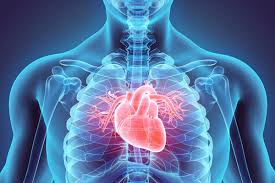

 Heart disease or Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015. Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s


So, in this kernel, I have conducted Exploratory Data Analysis or EDA of the heart disease dataset. Exploratory Data Analysis or EDA is a critical first step in analyzing a new dataset. The primary objective of EDA is to analyze the data for distribution, outliers and anomalies in the dataset. It enable us to direct specific testing of the hypothesis. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.

In [4]:
# Importing Libraries

import numpy as np
import pandas as pd
import os
for dirname_, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname , filename))
                        
                                   

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style = 'whitegrid')

In [6]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import Dataset

df = pd.read_csv('/Users/chandnisingh/Desktop/Google classroom notes/9th- Seaborn, Eda practicle/EDA/heart.csv')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Check shape of dataset

print('The shape of the datset: ' , df.shape)

The shape of the datset:  (303, 14)


In [10]:
# preview the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# summary of the datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
# statistical properties of dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
# Univariate Analysis

df['target'].nunique()

2

In [17]:
df['target'].unique()

array([1, 0])

In [18]:
# Frequency distribution

df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Here, 
1 stands for presence of heart disease
and , 0 stands for absence of heart disease.

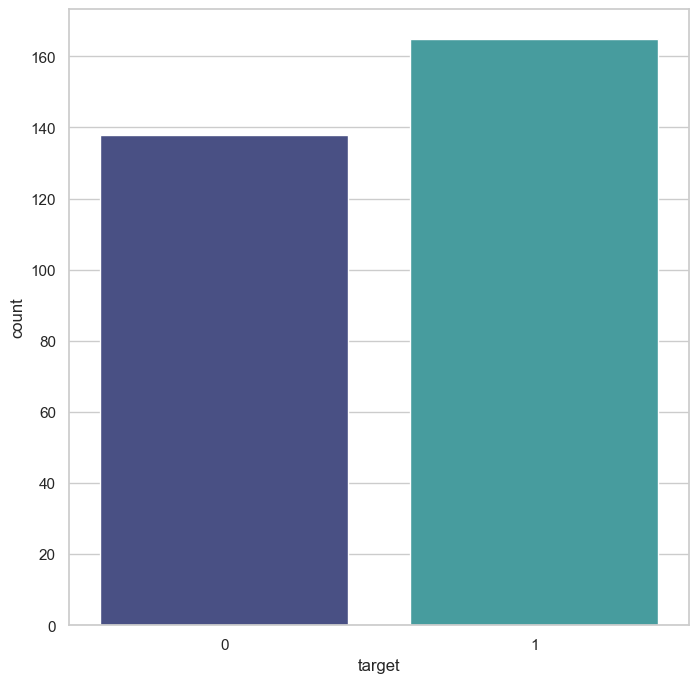

In [20]:
# Visualize frequency distribution of target variable
f, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x = 'target' , data = df, palette = 'mako')
plt.show()

##### Frequency distribution of `target` variable wrt `sex`

In [22]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

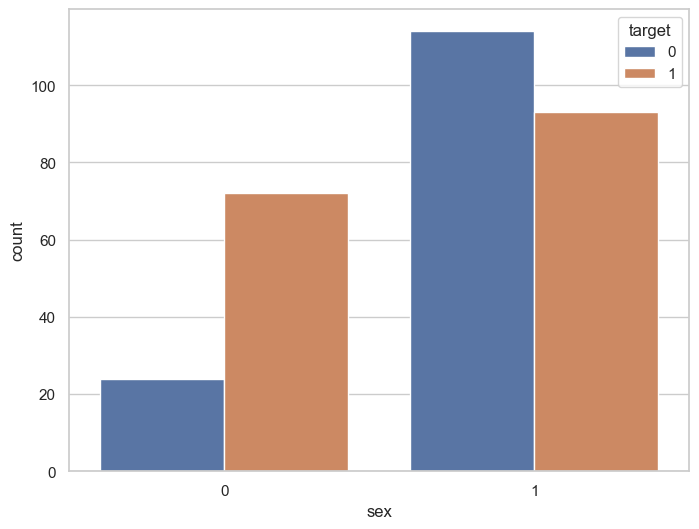

In [23]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = 'sex' , hue = 'target' , data = df)
plt.show()

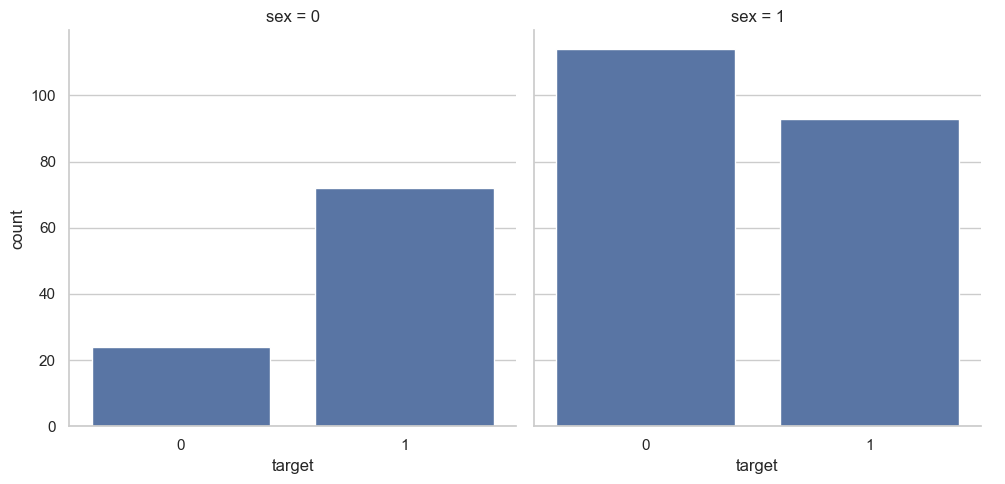

In [24]:
ax = sns.catplot(x = 'target' , col = 'sex' , data = df , kind = 'count' , height = 5 , aspect =1)

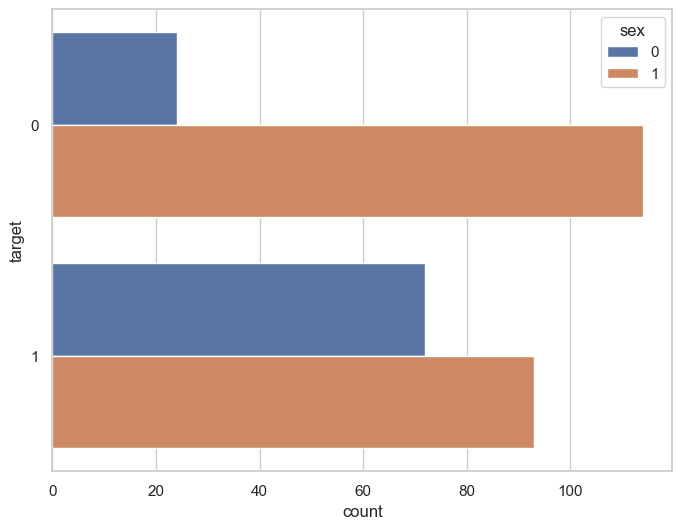

In [25]:
# plotting bars horizontally

f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(y = 'target' , hue= 'sex' , data=df)
plt.show()

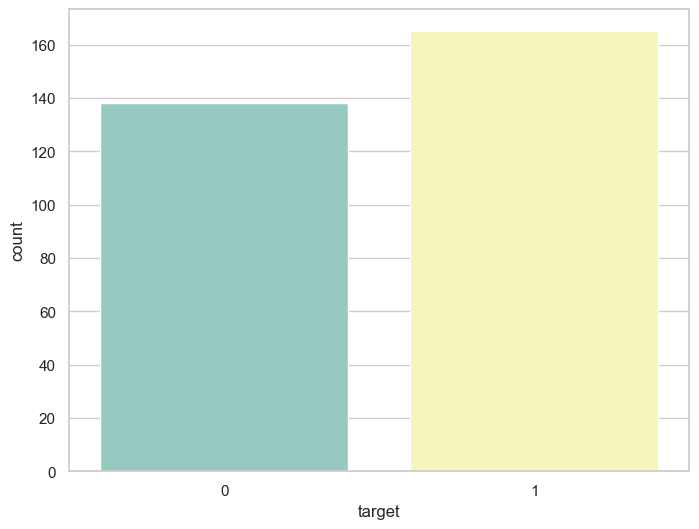

In [26]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'target' , palette = 'Set3' , data=df)
plt.show()

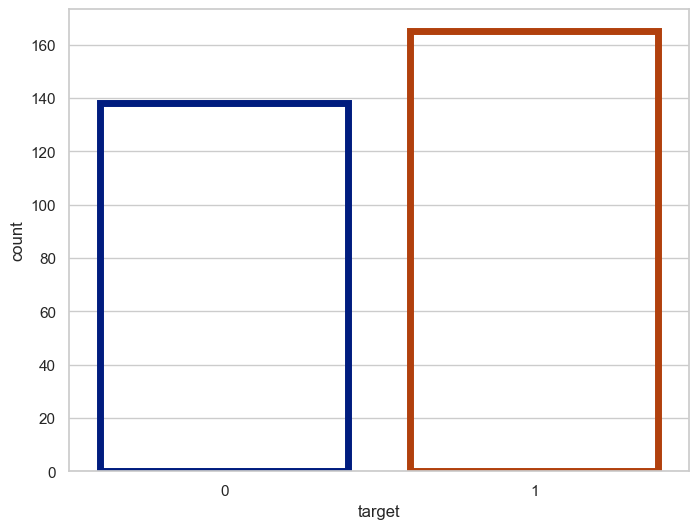

In [27]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'target' , data=df, facecolor = (0,0,0,0) , lw = 5, edgecolor=sns.color_palette('dark',4))
plt.show()

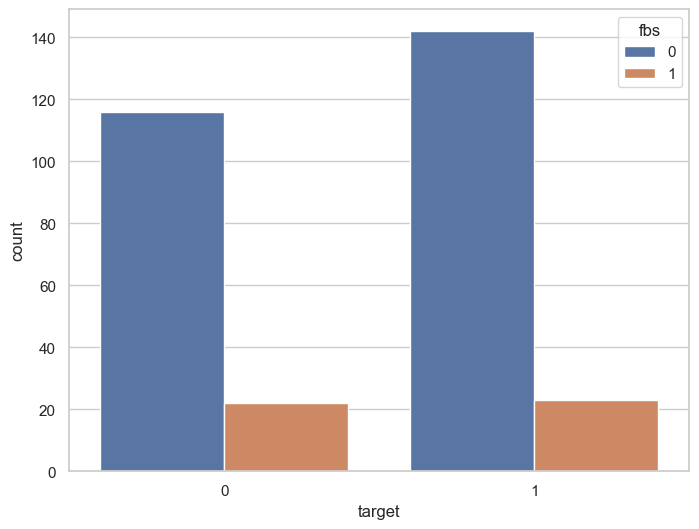

In [28]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'target' , hue= 'fbs' , data=df)
plt.show()

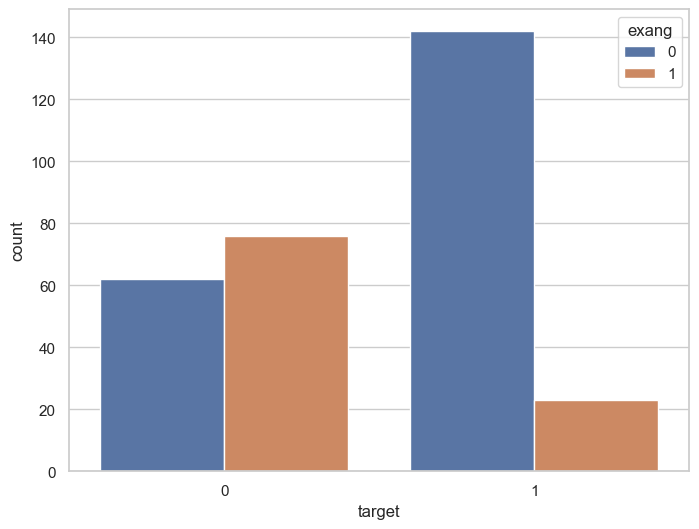

In [29]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'target' , hue= 'exang' , data=df)
plt.show()

# Bivariate analysis

In [31]:
correlation = df.corr()

In [32]:
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [33]:
# Analysis of 'target' and 'cp' variable 

In [34]:
df['cp'].nunique()

4

In [35]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

#### visulaize the frequency of 'cp' variable

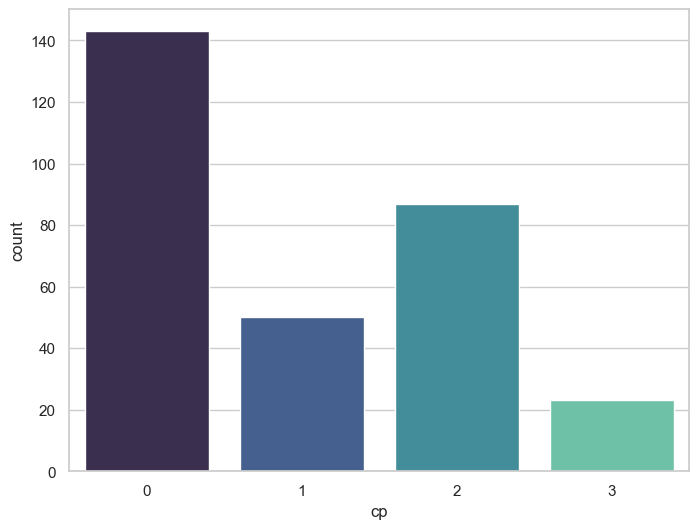

In [37]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'cp' , data=df , palette = 'mako')
plt.show()

In [38]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

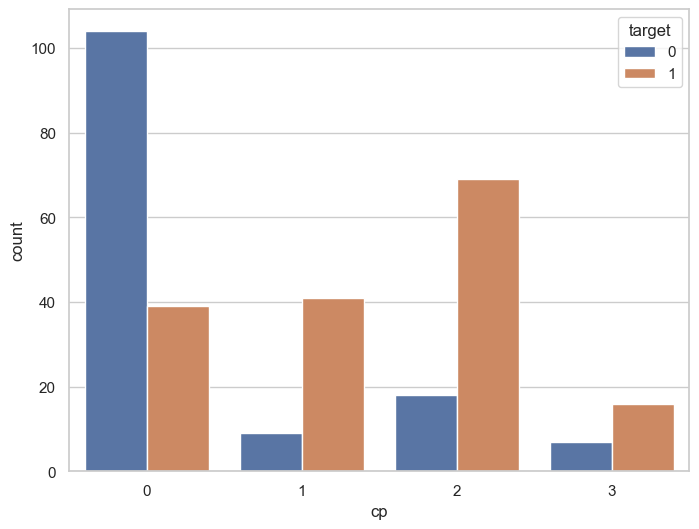

In [39]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'cp' , hue= 'target' , data=df)
plt.show()

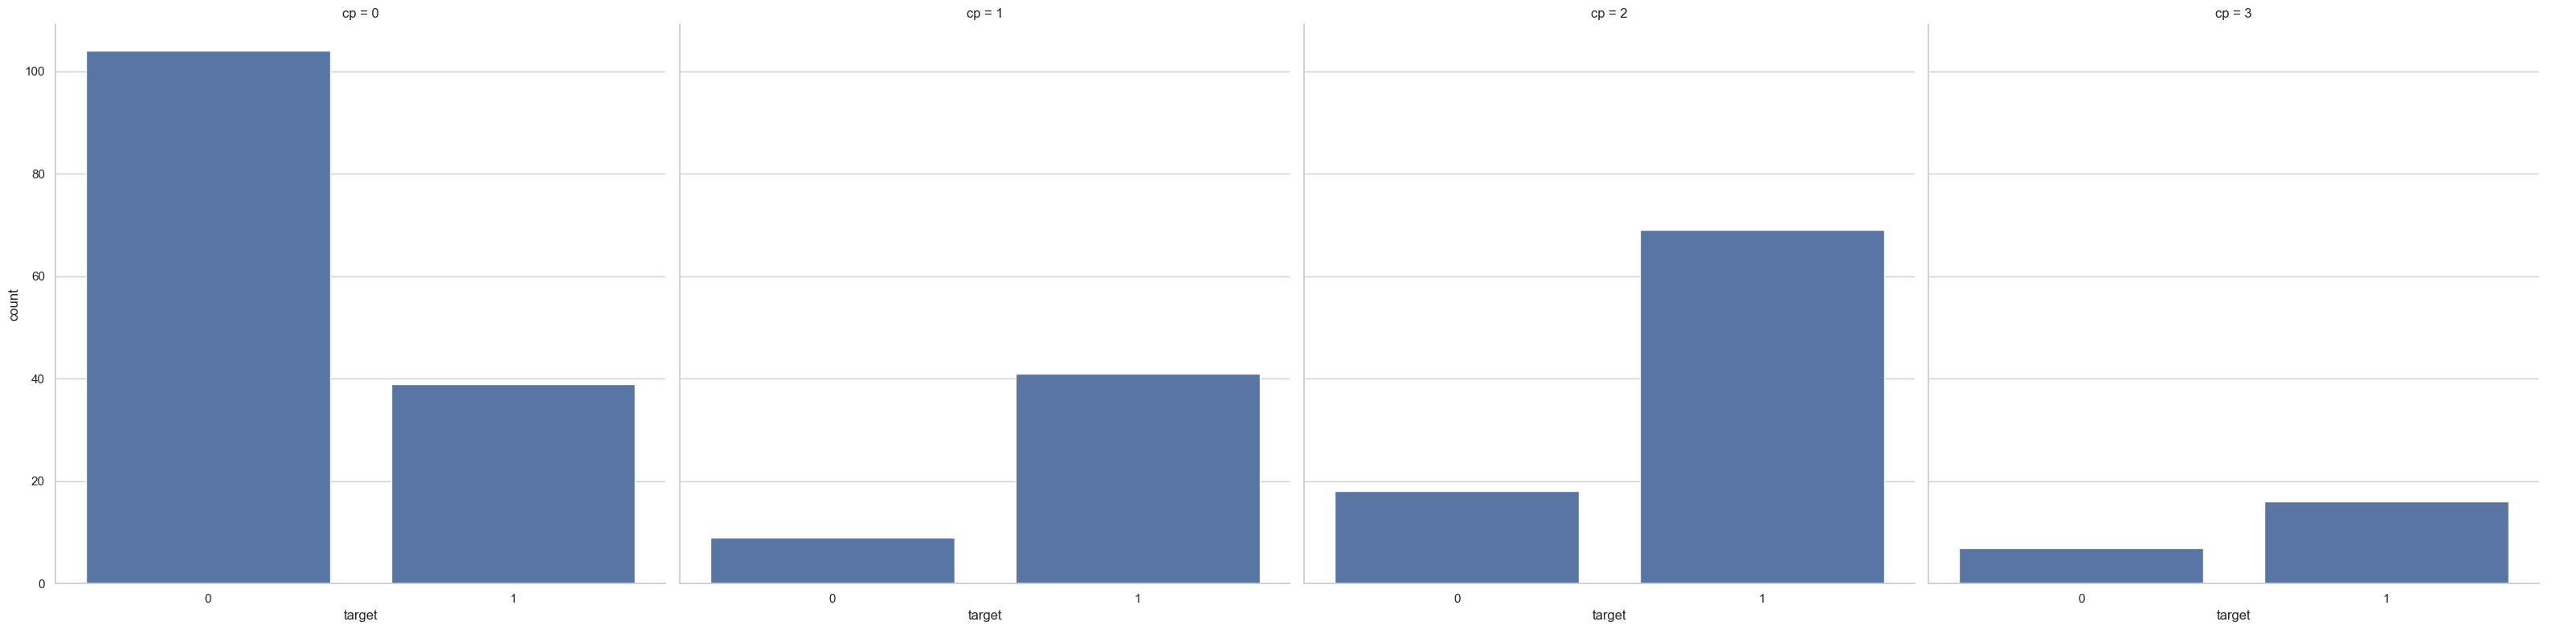

In [40]:
ax = sns.catplot(x = 'target' , col= 'cp' , data= df, kind = 'count', height = 8 , aspect =1)

In [41]:
df['thalach'].nunique()

91

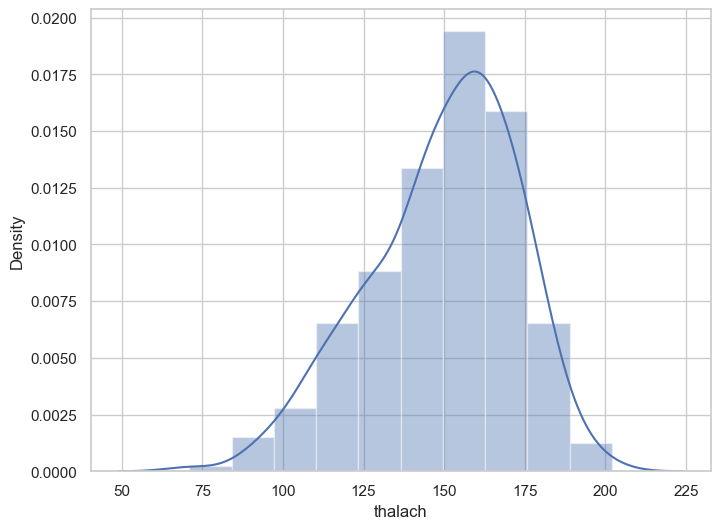

In [42]:
f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
ax = sns.distplot(x ,bins=10)
plt.show()

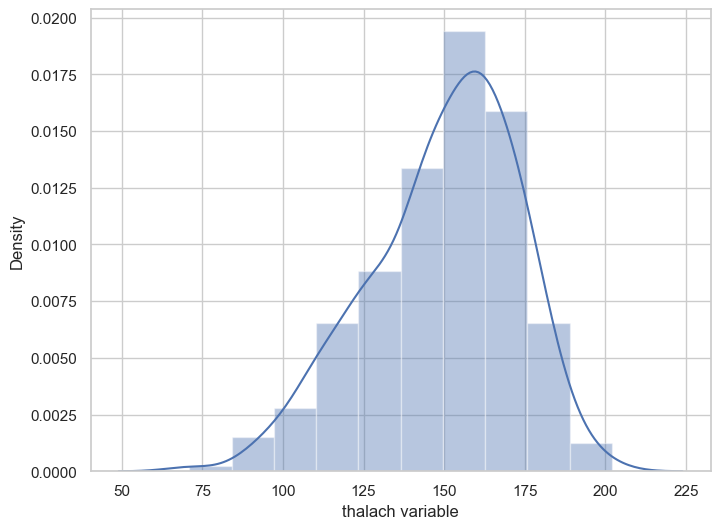

In [43]:
f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
x = pd.Series(x, name = 'thalach variable')
ax = sns.distplot(x , bins =10)
plt.show()

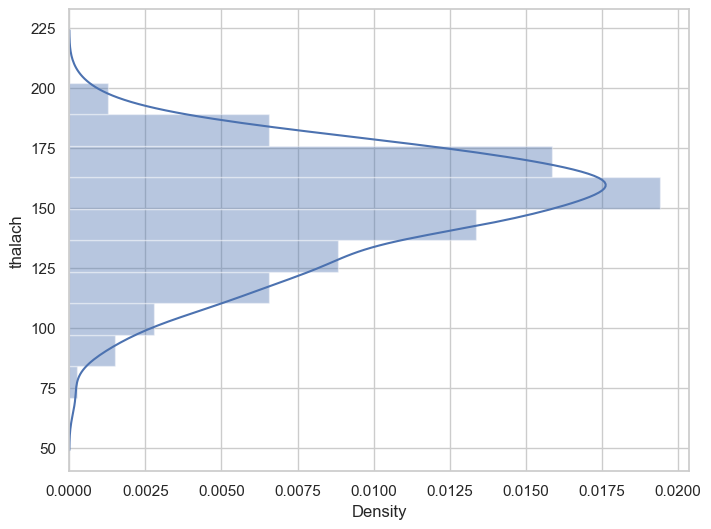

In [44]:
f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
ax = sns.distplot(x , bins =10, vertical =True)
plt.show()

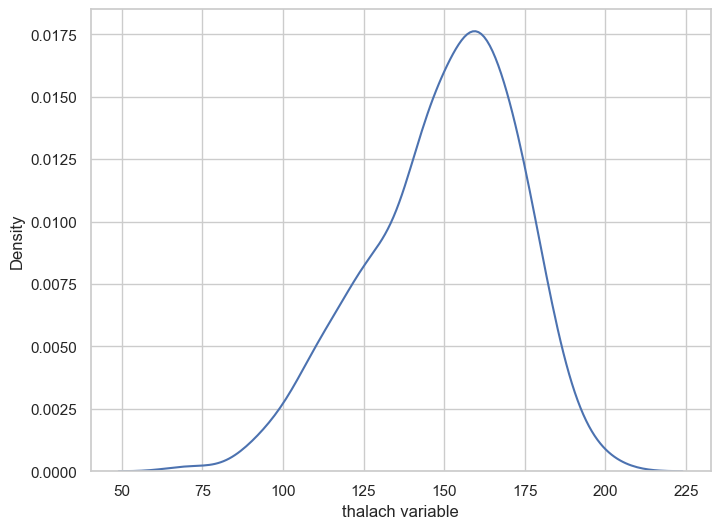

In [45]:
#kde 
f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
x = pd.Series(x, name = 'thalach variable')
ax = sns.kdeplot(x )
plt.show()

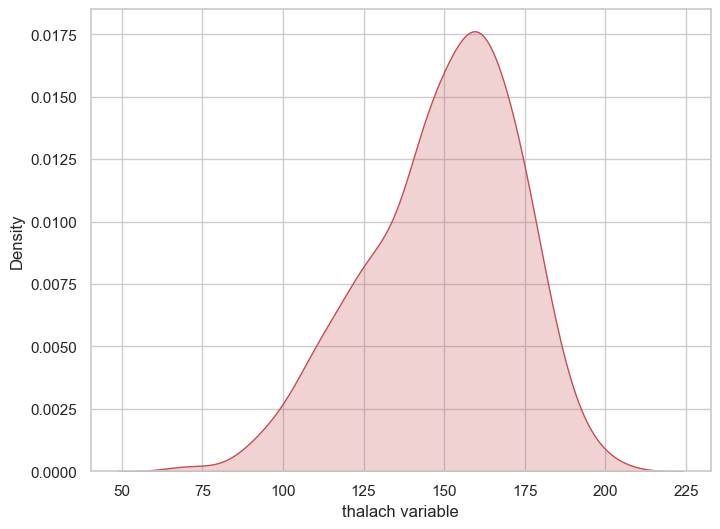

In [46]:
f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
x = pd.Series(x, name = 'thalach variable')
ax = sns.kdeplot(x , shade= True, color = 'r')
plt.show()

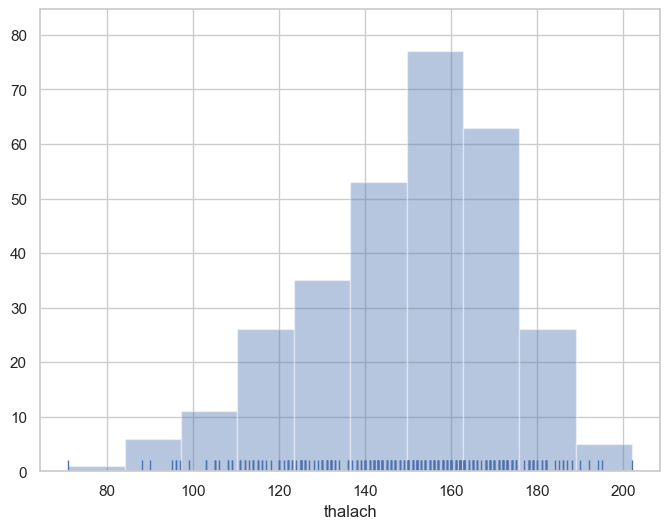

In [47]:
# histogram

f,ax = plt.subplots(figsize=(8,6))
x = df['thalach']
ax = sns.distplot(x ,kde = False, rug = True, bins =10)
plt.show()

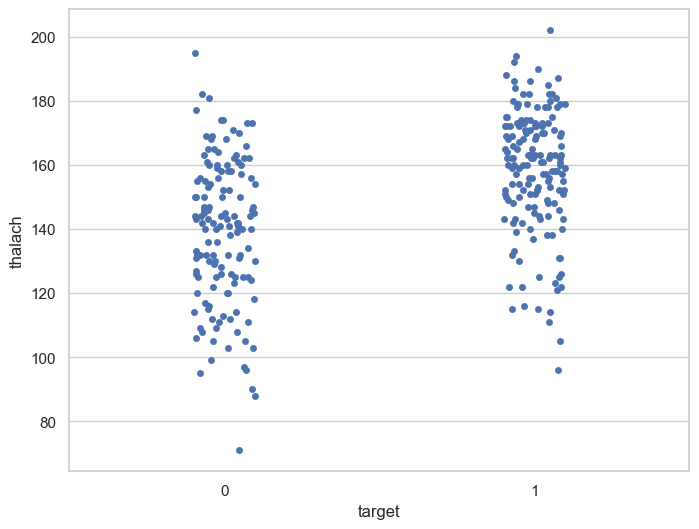

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

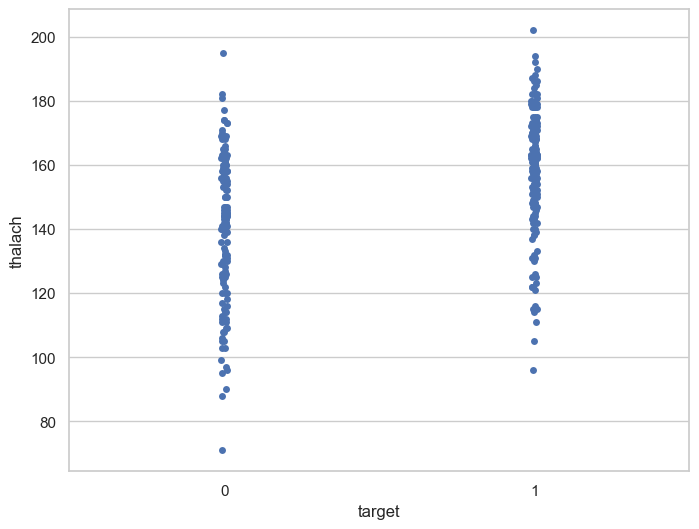

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

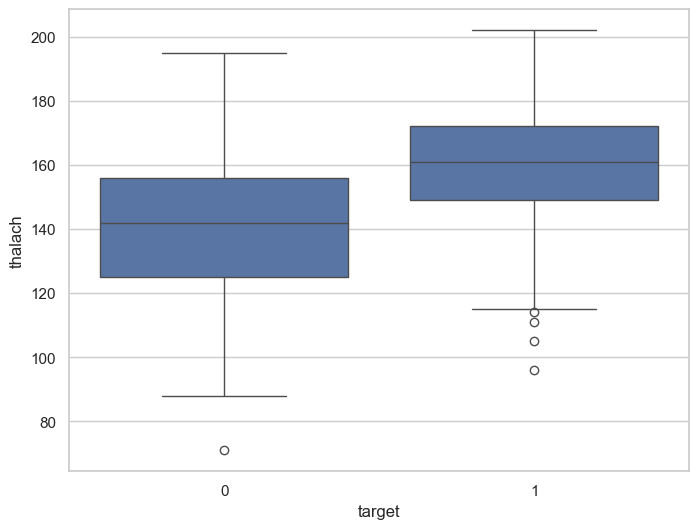

In [50]:
#boxplot
f, ax= plt.subplots(figsize = (8,6))
sns.boxplot(x = 'target' , y = 'thalach' , data = df)
plt.show()

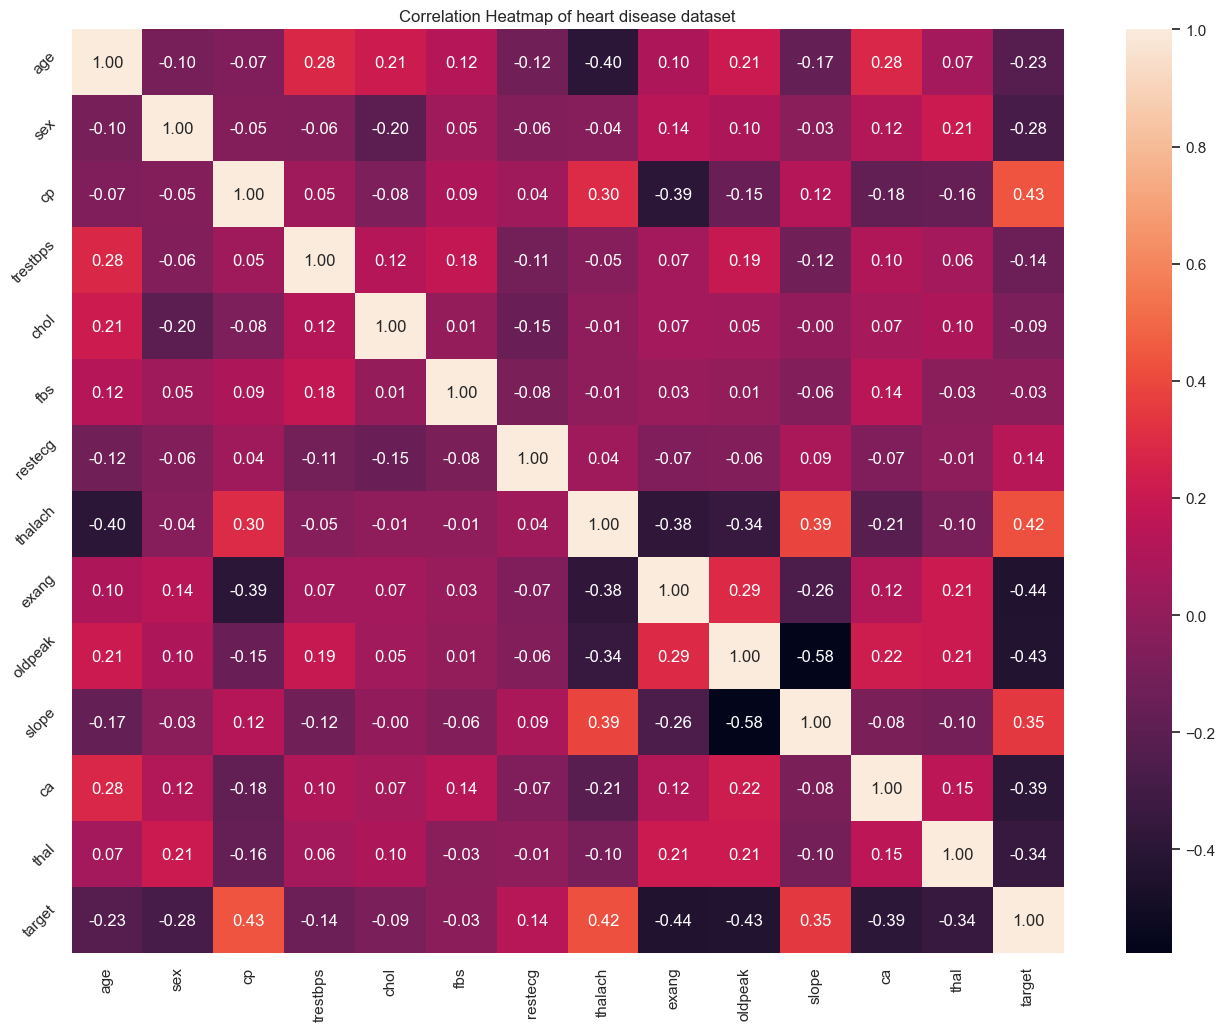

In [51]:
# Heatmap

plt.figure(figsize = (16,12))
plt.title('Correlation Heatmap of heart disease dataset')
a=sns.heatmap(correlation , annot = True, fmt = '.2f' , linecolor = 'white')
a.set_xticklabels(a.get_xticklabels(), rotation =90)
a.set_yticklabels(a.get_yticklabels(), rotation= 45)
plt.show()

In [ ]:
# Pairplot

num_var = ['age','trestbps' , 'chol','thalach','oldpeak','target']
sns.pairplot(df[num_var], kind = 'scatter' ,  diag_kind = 'hist')
plt.show()

In [ ]:
# analysis of age and other variables 

In [ ]:
df['age'].describe()

In [ ]:
df['age'].nunique()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.stripplot(x = 'target' , y = 'age' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'target' , y = 'age' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = 'age' , y = 'trestbps' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.regplot(x = 'age' , y = 'trestbps' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = 'age' , y = 'chol' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.regplot(x = 'age' , y = 'chol' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = 'chol' , y = 'thalach' , data=df)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
sns.regplot(x = 'chol' , y = 'thalach' , data=df)
plt.show()

#### Dealing with missing value

In [ ]:
df.isnull()

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().any().any()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull().mean()

In [ ]:
df.isnull().values.sum()

#### Check with Assert statement 
Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts

assert 1 == 1 (return Nothing if the value is True)

assert 1 == 2 (return AssertionError if the value is False)


In [ ]:
assert pd.notnull(df).all().all()

In [ ]:
assert (df>=0).all().all()

### Outlier Detection 

In [ ]:
df['age'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = df['age'])
plt.show()

In [ ]:
df['trestbps'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = df['trestbps'])
plt.show()

In [ ]:
df['chol'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = df['chol'])
plt.show()

In [ ]:
df['thalach'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = df['thalach'])
plt.show()

In [ ]:
df['oldpeak'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = df['oldpeak'])
plt.show()

#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.
